In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

C:\Users\Kamran\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print("numpy version:", np.__version__)
print("OpenCV version:", cv2.__version__)
print("insightface version:", insightface.__version__)

numpy version: 1.26.1
OpenCV version: 4.10.0
insightface version: 0.7.3


# Step 1. Detect Faces

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

C:\Users\Kamran\AppData\Local\Programs\Python\Python312\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Kamran/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Kamran/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Kamran/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Kamran/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Kamran/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112]

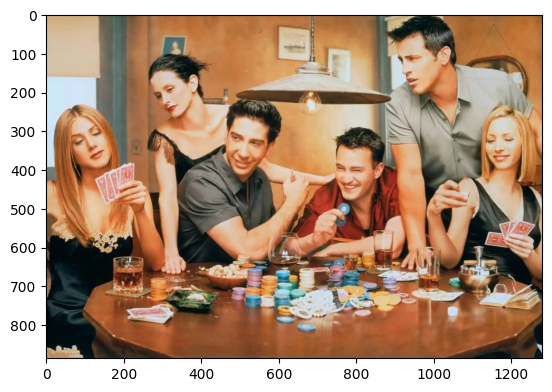

In [4]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [5]:
faces = app.get(img)

C:\Users\Kamran\AppData\Roaming\Python\Python312\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


## Crop and plot Faces

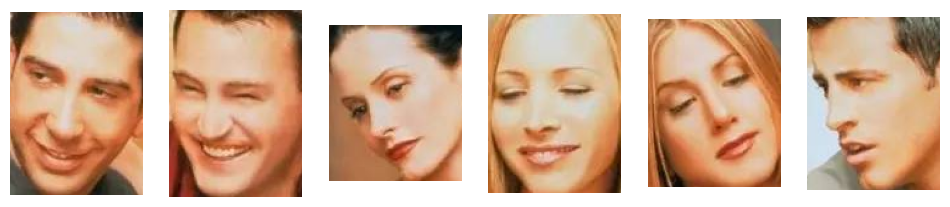

In [6]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    axs[i].axis('off')

# Step 2. Face Swapping 

In [7]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


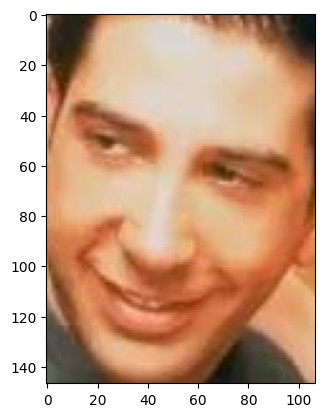

In [8]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [9]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

## Plot the Swapped Faces

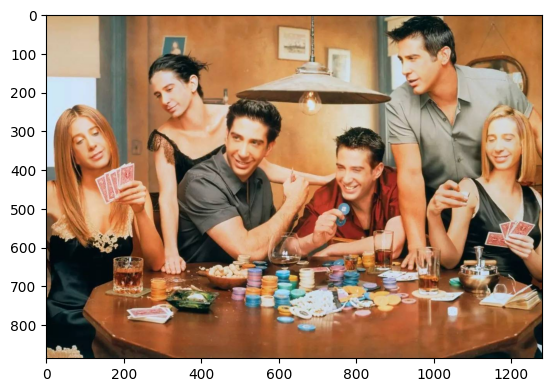

In [10]:
plt.imshow(res[:,:,::-1])
plt.show()

## Swap in my Face

In [11]:
my_img = cv2.imread('source.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

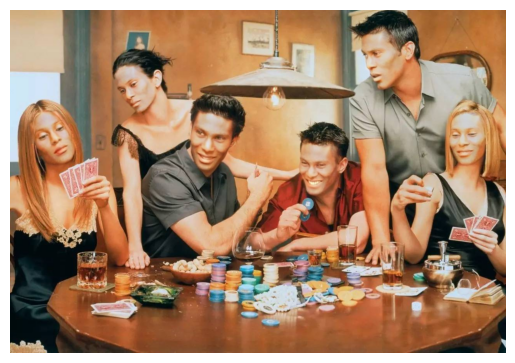

In [12]:
#Detect the Face
my_faces = app.get(my_img)

#Replace faces in friends image
res = img.copy()
for face in faces:
    res = swapper.get(res, face, my_faces[0], paste_back=True)

fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show